In [1]:
from __future__ import annotations
from typing import Self
from pprint import pprint

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler


## 1

### Загрузка, предобработка, визуализация

> 1. Выбор датасета:    
>    - Датасет о пассажирах Титаника: [Titanic Dataset](https://www.kaggle.com/c/titanic)
>    - Датасет о диабете: [Diabetes Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
>    - Загрузите выбранный датасет и выполните предварительную обработку данных.
>    - Получите и визуализируйте (графически) статистику по датасету (включая
>      количество, среднее значение, стандартное отклонение, минимум, максимум и
>      различные квантили).


In [2]:
ds = pd.read_csv("../res/diabetes.csv")
ds.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
402,5,136,84,41,88,35.0,0.286,35,1
207,5,162,104,0,0,37.7,0.151,52,1
59,0,105,64,41,142,41.5,0.173,22,0
209,7,184,84,33,0,35.5,0.355,41,1
682,0,95,64,39,105,44.6,0.366,22,0


In [3]:
ds.info(), ds.describe(), f'is there any nulls? { ds.isna().any().any() }'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(None,
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   768.000000  768.000000     768.000000     768.000000  768.000000   
 mean      3.845052  120.894531      69.105469      20.536458   79.799479   
 std       3.369578   31.972618      19.355807      15.952218  115.244002   
 min       0.000000    0.000000       0.000000       0.000000    0.000000   
 25%       1.000000   99.000000      62.000000       0.000000    0.000000   
 50%       3.000000  117.000000      72.000000      23.000000   30.500000   
 75%       6.000000  140.250000      80.000000      32.000000  127.250000   
 max      17.000000  199.000000     122.000000      99.000000  846.000000   
 
               BMI    Pedigree         Age     Outcome  
 count  768.000000  768.000000  768.000000  768.000000  
 mean    31.992578    0.471876   33.240885    0.348958  
 std      7.884160    0.331329   11.760232    0.476951  
 min      0.000000    0.078000   21.000000    0.000000  
 25%     27.3

Типы распознаны, данные без налов, но есть некорректные значения, например, 'BloodPressure'=0. Их стоит заменить другими значениями. Возьмем для этого среднее.

In [4]:
cols_fix = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
ds[cols_fix] = ds.replace(0, ds.mean(axis=0))[cols_fix]
ds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


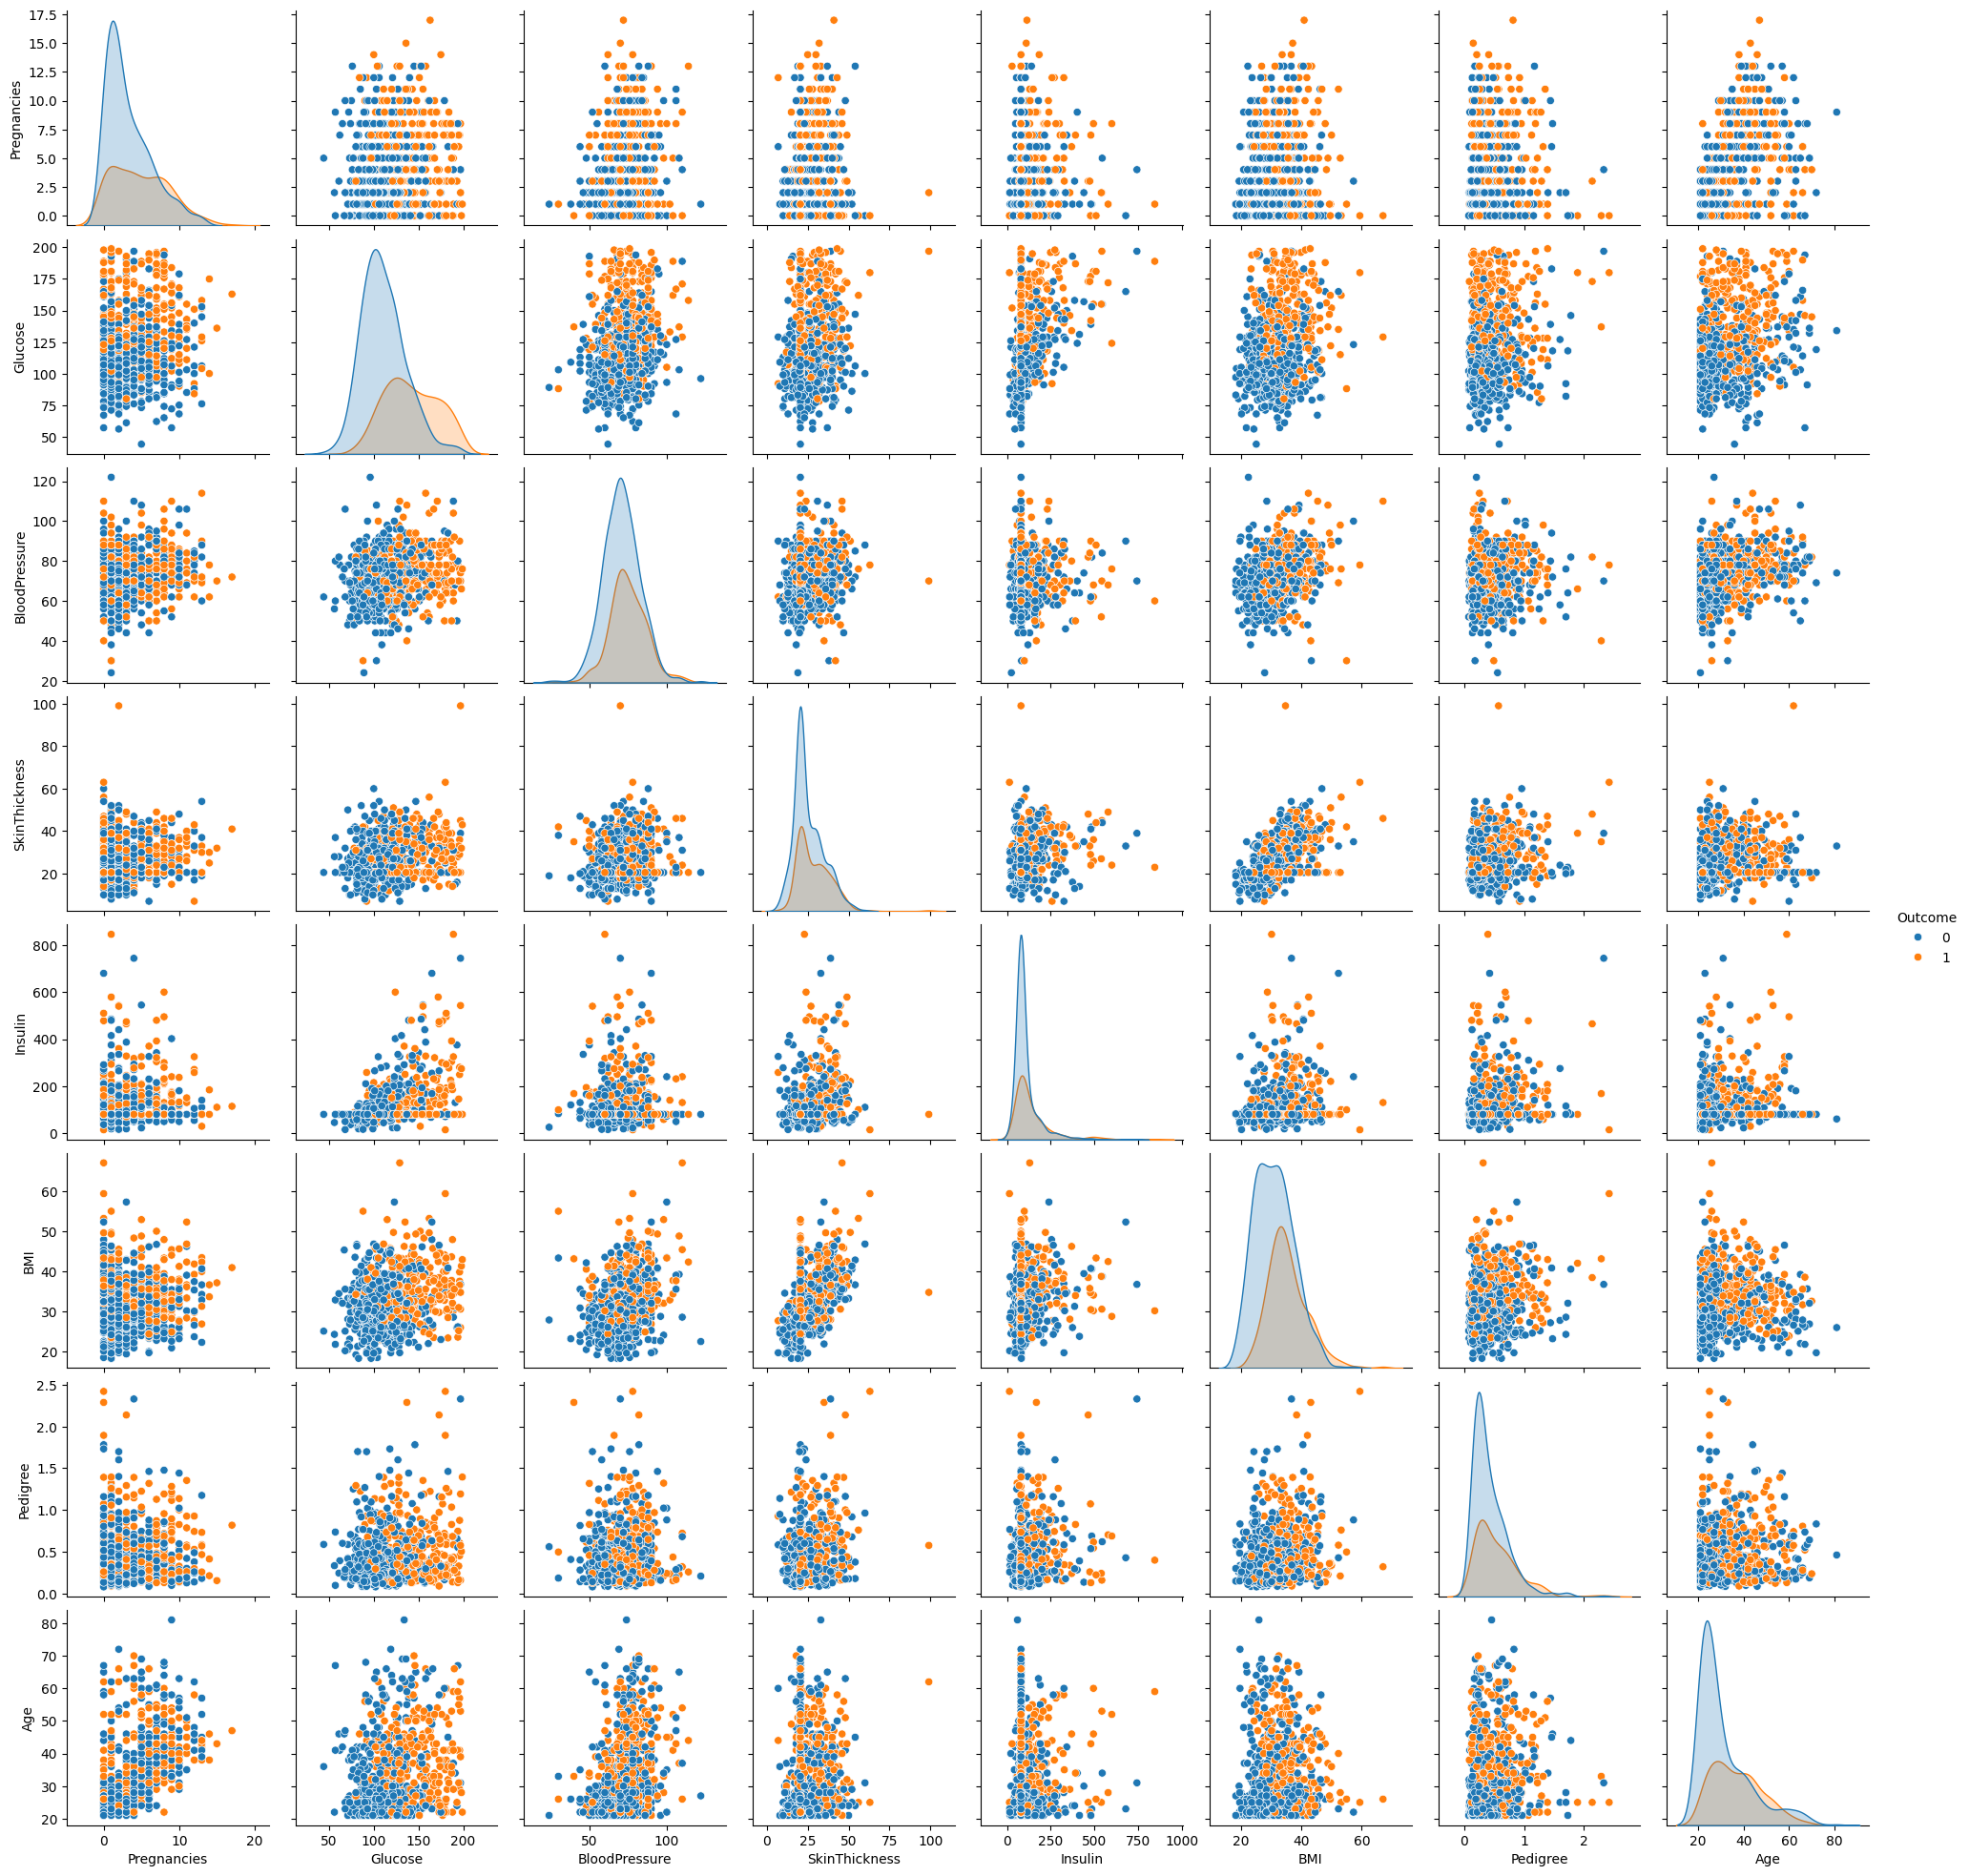

In [5]:
sns.pairplot(ds, hue='Outcome')

Смотря на гистограммы можно сказать, что датасет, в принципе, сбалансированный: распределения нормальные +-, есть пики в некоторых признаках, `Outcome` соотносится $\approx 2:1$ (с этим, возможно, нужно будет что-то делать). Видно, что класы визуально плохо отделяются, хотя и есть некоторая *грань*.

### Разделение на обуч./тест.

> - Разделите данные на обучающий и тестовый наборы в
>   соотношении, которое вы считаете подходящим.


In [11]:
X_train, X_test, y_train, y_test = train_test_split(ds.drop('Outcome', axis=1), ds['Outcome'], test_size=0.3)

### Модель Логистической регрессии

> - Реализуйте логистическую регрессию "с нуля" без использования 
>   сторонних библиотек, кроме NumPy и Pandas. 
>   Ваша реализация логистической регрессии должна включать в себя:
>    - Функцию для вычисления гипотезы (sigmoid function).
>    - Функцию для вычисления функции потерь (log loss).
>    - Метод обучения, который включает в себя градиентный спуск.
>    - Возможность варьировать гиперпараметры, такие как
>      коэффициент обучения (learning rate) и количество итераций.


**Предсказания:** 
$$
y_{pred}(x, w) = \frac{1}{1 + e^{-\langle x, w \rangle}}
$$

**Лосс (LogLoss):** 
$$
L(w) = -y\, log\,y_{pred} - (1-y)\,log\,(1-y_{pred})
$$

**Градиент:**
$$
\frac{\partial{L}}{\partial{w}}
= \left(-\frac{y}{y_{pred}} + \frac{1-y}{1-y_{pred}}\right)\frac{\partial{y_{pred}}}{\partial{w}}
$$

$$
\frac{\partial{y_{pred}}}{\partial{w}} = \frac{-1}{(1+e^{-\langle x, w \rangle})^2} e^{-\langle x, w \rangle} (-x) = y_{pred}(1-y_{pred})x
$$

$$
\frac{\partial{L}}{\partial{w}} = (y_{pred} - y) x
$$

In [7]:
def logit(x, w):
    return np.dot(x, w)

def sigmoid(h):
    return 1.0 / (1 + np.exp(-h))

class LogisticRegression(object):
    def __init__(self):
        self.w = None

    def fit(self, X, y, max_iter: int=100, lr: float=0.1):
        n, k = X.shape

        if self.w is None:
            self.w = np.random.randn(k + 1)

        X_train = np.concatenate((np.ones((n, 1)), X), axis=1)

        losses = []

        for iter_num in range(max_iter):
            z = sigmoid(logit(X_train, self.w))
            grad = ((X_train.T) @ (z - y)) / len(y)

            self.w -= grad * lr

            losses.append(self.__loss(y, z))

        return losses

    def predict_proba(self, X):
        n, k = X.shape
        X_ = np.concatenate((np.ones((n, 1)), X), axis=1)
        return sigmoid(logit(X_, self.w))

    def predict(self, X, threshold: float=0.5):
        return self.predict_proba(X) >= threshold

    def get_weights(self):
        return self.w

    def __loss(self, y, p):
        p = np.clip(p, 1e-10, 1 - 1e-10)
        return np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

## 2-3 Тестирование

> 2. Исследование гиперпараметров:
>   - Проведите исследование влияния гиперпараметров на
>     производительность модели. Варьируйте следующие гиперпараметры:
>   - Коэффициент обучения (learning rate).
>   - Количество итераций обучения.
>   - Метод оптимизации (например, градиентный спуск или оптимизация Ньютона).


> 3. Оценка модели:
>    - Для каждой комбинации гиперпараметров оцените
>      производительность модели на тестовом наборе данных, используя метрики,
>      такие как accuracy, precision, recall и F1-Score.


Пункты 2 и 3 сделаем сразу, тем более не требуется самим реализовать метрики:

In [12]:
sc = MinMaxScaler().fit(X_train)
best_model = { 
    'f1': -1, 
    'accuracy': -1, 
    'precision': -1,
    'recall': -1,
    'learning_rate': -1,
    'max_iterations': -1,
    'model': None,
}


for learning_rate in [0.01, 0.05, 0.1, 0.2, 0.5, 0.7]:
    for max_iterations in [100, 200, 500, 1000, 1500, 2000, 3000]:

        model = LogisticRegression()
        model.fit(sc.transform(X_train), y_train, max_iter=max_iterations, lr=learning_rate)
        y_pred = model.predict(sc.transform(X_test))

        _accuracy = accuracy_score(y_test, y_pred)
        _precision = precision_score(y_test, y_pred)
        _recall = recall_score(y_test, y_pred)
        _f1 = f1_score(y_test, y_pred)

        if False: # verbose?
            print(f"{learning_rate=}, {max_iterations=}")
            print(f"Accuracy:   {_accuracy}")
            print(f"Precision:  {_precision}")
            print(f"Recall:     {_recall}")
            print(f"F1:         {_f1}")

        if _f1 > best_model['f1']:
            best_model['model'] = model
            best_model['f1'] = _f1
            best_model['accuracy'] = _accuracy
            best_model['precision'] = _precision
            best_model['recall'] = _recall
            best_model['learning_rate'] = learning_rate
            best_model['max_iterations'] = max_iterations
        
print(f"Best model:")
pprint(best_model)

Best model:
{'accuracy': 0.7619047619047619,
 'f1': 0.5925925925925926,
 'learning_rate': 0.5,
 'max_iterations': 3000,
 'model': <__main__.LogisticRegression object at 0x0000019333ED8310>,
 'precision': 0.6666666666666666,
 'recall': 0.5333333333333333}


## Выводы

> Сделайте выводы о том, какие значения гиперпараметров наилучшим образом
работают для данного набора данных и задачи классификации. Обратите внимание
на изменение производительности модели при варьировании гиперпараметров.

Самописная модель логистической регрессии оказалась довольно производительной. Наилучшее качество пердстказания проявляется при `learning_rate=0.5`, `max_iter=3000`. Видимо количество итераций можно увеличивать безгранично — просто качество не будет расти.